In [1]:
no <- 1:4
name <- c('Apple','Banana','Peach','Berry')
price <- c(500,200,200,50)
qty <- c(5,4,3,2)

In [2]:
# vector 4 -> dataframe
fruit <- data.frame(no,name,price,qty)
fruit; str(fruit)

no,name,price,qty
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


'data.frame':	4 obs. of  4 variables:
 $ no   : int  1 2 3 4
 $ name : Factor w/ 4 levels "Apple","Banana",..: 1 2 4 3
 $ price: num  500 200 200 50
 $ qty  : num  5 4 3 2


In [3]:
# 현재 메모리에 있는 변수 보기
ls()

[1] "fruit" "name"  "no"    "price" "qty"

In [4]:
# 메모리 형태로 파일 보관하기
save(no,fruit,name,file='../Data/testFruit.txt')

In [5]:
rm(no,fruit,name)
ls()

[1] "price" "qty"

In [6]:
# 메모리로 불러오기
load("../Data/testFruit.txt")

In [7]:
fruit

no,name,price,qty
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


In [8]:
ls()

[1] "fruit" "name"  "no"    "price" "qty"

In [9]:
# fruit csv로 저장하기
write.csv(fruit, '../Data/fruit.csv')

In [10]:
fruit2<-read.csv('../Data/fruit.csv') 
# r에서 퍼포먼스를 위해 부여하는 rownames 확인
write.csv(fruit2, '../Data/fruit2.csv')
read.csv('../Data/fruit2.csv')
# 또 추가된 rownames, 저장할 때 잘 해야한다.

X.1,X,no,name,price,qty
1,1,1,Apple,500,5
2,2,2,Banana,200,4
3,3,3,Peach,200,3
4,4,4,Berry,50,2


In [11]:
write.csv(fruit, '../Data/fruit.csv', row.names=F) # rownames 비활성화

In [12]:
read.csv('../data/fruit.csv') # 메모리 절약!

no,name,price,qty
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


---
# 세계 GDP 순위 데이타의 정제 및 차트만들기

In [13]:
GDP_ranking <- read.csv('../Data/gdp.csv')

In [14]:
GDP_ranking # 데이터 정제 필요

X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
,,NA,,,
,,NA,,(millions of,
,Ranking,NA,Economy,US dollars),
,,NA,,,
USA,1,NA,United States,"20,494,100",
CHN,2,NA,China,"13,608,152",
JPN,3,NA,Japan,"4,970,916",
DEU,4,NA,Germany,"3,996,759",
GBR,5,NA,United Kingdom,"2,825,208",
FRA,6,NA,France,"2,777,535",


In [15]:
nrow(GDP_ranking)

[1] 328

In [16]:
# 데이터 정제하기 1:4 행 삭제, 3,6 열 삭제
GDP_ranking2 <- GDP_ranking[-c(1:4),-c(3,6)]
head(GDP_ranking2)

,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"


In [17]:
# 상위 15개국만 선별한다.
GDP_ranking15 <- head(GDP_ranking2, 15); GDP_ranking15

,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [18]:
# 컬럼 이름 정의 : Code, Ranking, Nation, GDP
colnames(GDP_ranking15) <- c('Code','Ranking','Nation','GDP')
GDP_ranking15

,Code,Ranking,Nation,GDP
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [19]:
# rownames 새로 구성하기, c() 기본 인덱스로 1부터 nrow만큼 들어간다
rownames(GDP_ranking15) <- c(); GDP_ranking15

Code,Ranking,Nation,GDP
USA,1,United States,"20,494,100"
CHN,2,China,"13,608,152"
JPN,3,Japan,"4,970,916"
DEU,4,Germany,"3,996,759"
GBR,5,United Kingdom,"2,825,208"
FRA,6,France,"2,777,535"
IND,7,India,"2,726,323"
ITA,8,Italy,"2,073,902"
BRA,9,Brazil,"1,868,626"
CAN,10,Canada,"1,712,510"


In [20]:
# 구조 확인하기
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 230 levels "","ABW","AFG",..: 216 38 103 52 72 68 94 100 28 34 ...
 $ Ranking: Factor w/ 212 levels "",".. Not available.  ",..: 3 114 131 142 153 164 175 186 197 4 ...
 $ Nation : Factor w/ 231 levels "","Afghanistan",..: 219 43 104 78 218 73 95 102 28 37 ...
 $ GDP    : Factor w/ 220 levels ""," .. "," 1,022 ",..: 78 44 137 113 77 75 74 67 20 19 ...


In [21]:
# 특정 행,열을 삭제했을 경우 구조를 재구성 (구조는 변경 안돼서 그대로 가져옴)
GDP_ranking15$Code <- factor(GDP_ranking15$Code)

In [22]:
# for문을 이용한 factor 조정.
for(i in 1:ncol(GDP_ranking15)){
    GDP_ranking15[,i] <- factor(GDP_ranking15[,i])
}

In [23]:
# 막대그래프(hist) 출력하기, 먼저 값들을 숫자로 바꿔야 한다.
library(stringr)


Attaching package: ‘stringr’

The following object is masked _by_ ‘.GlobalEnv’:

    fruit



'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : num  20494100 13608152 4970916 3996759 2825208 ...


Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“PostScript 

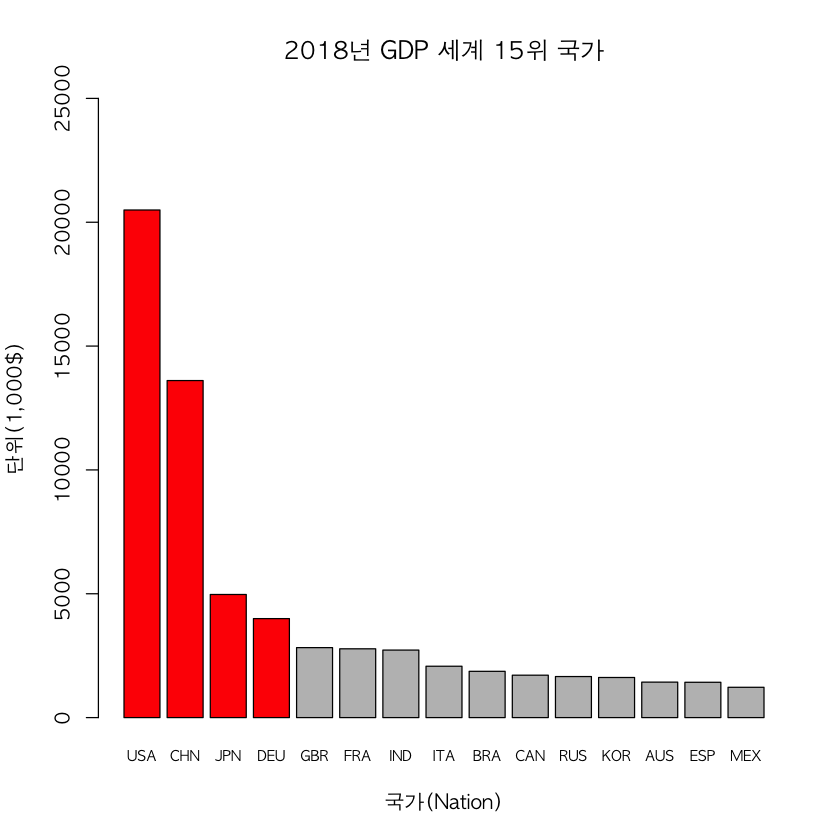

In [24]:
GDP_ranking15$GDP <- as.numeric(str_remove_all(GDP_ranking15$GDP,','))
str(GDP_ranking15)
# 막대그래프 꾸미기
options(scipen=100) # 지수 표기 없애기
par(family='AppleGothic') # mac에서 한글 표기하기
barplot(GDP_ranking15$GDP/1000, # data, 1000 나눠서 간단표기
main = "2018년 GDP 세계 15위 국가",
xlab = '국가(Nation)', # x축 label
ylab = '단위(1,000$)', #y축 label
names = GDP_ranking15$Code, # x축 요소 names
cex.names = 0.7, # names 폰트 크기 조절, default=1
#col=rainbow(nrow(GDP_ranking15)) # bar 색상, vector로 반복되면서 입력된다.
#col = c(rep('red',2),rep('blue',9),'red',rep('blue',3))
#col = ifelse(GDP_ranking15$Code==c('USA','CHN','KOR'),'red','blue'),
# GDP가 3000 이상인 국가만 빨간색으로 표시하기
col = ifelse(GDP_ranking15$GDP/1000>=3000,'red','grey'),
ylim = c(0,25000) # y축 값 범위? 지정
)

---
# 데이타 처리

In [25]:
# 데이터 정렬
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [26]:
# iris를  Sepal.Length 기준, 오름차순으로 정렬하기
head(arrange(iris,Sepal.Length)) # arrange(dataframe,기준1)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,2.9,1.4,0.2,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.1,1.5,0.2,setosa


In [27]:
# Sepal.Length 기준으로 정렬 후 동일한 크기의 데이터는 Petal.Length 기준 오름차순으로 정렬
arrange(iris,Sepal.Length,Petal.Length) # arrange(dataframe,기준1,기준2)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.6,1.0,0.2,setosa
4.6,3.4,1.4,0.3,setosa
4.6,3.2,1.4,0.2,setosa
4.6,3.1,1.5,0.2,setosa
4.7,3.2,1.3,0.2,setosa


In [28]:
#Sepal.Length 기준, 내림차순으로 정렬
head(arrange(iris,desc(Sepal.Length))) # arrange default=ascend

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7.9,3.8,6.4,2.0,virginica
7.7,3.8,6.7,2.2,virginica
7.7,2.6,6.9,2.3,virginica
7.7,2.8,6.7,2.0,virginica
7.7,3.0,6.1,2.3,virginica
7.6,3.0,6.6,2.1,virginica


In [29]:
# Sepal.Length 기준, 내림차순 정렬 후 Sepal.Length와 Sepal.Width만 보기
head(arrange(iris,desc(Sepal.Length))[,1:2])
head(arrange(iris[,1:2],desc(Sepal.Length))) # dataframe 자체 범위 조정도 가능

Sepal.Length,Sepal.Width
7.9,3.8
7.7,3.8
7.7,2.6
7.7,2.8
7.7,3.0
7.6,3.0


Sepal.Length,Sepal.Width
7.9,3.8
7.7,3.8
7.7,2.6
7.7,2.8
7.7,3.0
7.6,3.0


---
### 샘플링(Sampling)
- 모집단을 대표할 수 있는 data들로 sampling 해야한다.

In [30]:
# 랜덤 샘플링(중복값 없이)
sample(1:45,6)

[1] 24 40 26  5 18 28

In [31]:
nrow(iris)
ncol(iris)

[1] 150

[1] 5

In [32]:
samp <- sample(1:nrow(iris),nrow(iris)*0.7) # 범위 iris nrow, 개수 70프로
head(samp)

[1]  96 131 144 129   1 141

In [33]:
irisSamp <- iris[samp,]
head(irisSamp)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
96,5.7,3.0,4.2,1.2,versicolor
131,7.4,2.8,6.1,1.9,virginica
144,6.8,3.2,5.9,2.3,virginica
129,6.4,2.8,5.6,2.1,virginica
1,5.1,3.5,1.4,0.2,setosa
141,6.7,3.1,5.6,2.4,virginica


In [34]:
summary(irisSamp)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.832   Mean   :3.039   Mean   :3.728   Mean   :1.192  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :37  
 versicolor:30  
 virginica :38  
                
                
                

In [35]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [36]:
table(irisSamp$Species)
# target Data인 species가 sampling 실패


    setosa versicolor  virginica 
        37         30         38 

In [37]:
# iris Sampling, Species 별로 vector로 만들어서
samp <- c(sample(1:50, 35),sample(51:100, 35),sample(101:150, 35))
irisSamp <- iris[samp,]
table(irisSamp$Species)


    setosa versicolor  virginica 
        35         35         35 

In [38]:
# Training Data와 Test Data 분리하기
iris.train <- iris[samp,]
iris.test <- iris[-samp,]

In [39]:
summary(iris.train)
summary(iris.test)
# 차이가 많이 나면 샘플링 miss!

  Sepal.Length   Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.30   Min.   :2.00   Min.   :1.000   Min.   :0.100   setosa    :35  
 1st Qu.:5.10   1st Qu.:2.80   1st Qu.:1.600   1st Qu.:0.300   versicolor:35  
 Median :5.80   Median :3.00   Median :4.300   Median :1.300   virginica :35  
 Mean   :5.83   Mean   :3.05   Mean   :3.785   Mean   :1.221                  
 3rd Qu.:6.40   3rd Qu.:3.30   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.90   Max.   :4.40   Max.   :6.900   Max.   :2.500                  

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.400   Min.   :1.300   Min.   :0.200  
 1st Qu.:5.400   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.876   Mean   :3.073   Mean   :3.696   Mean   :1.149  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.200   Max.   :6.300   Max.   :2.300  
       Species  
 setosa    :15  
 versicolor:15  
 virginica :15  
                
                
                

---
### 부분집합
- subset

In [40]:
# iris에서 Species가 setosa인 것만 추출하여 iris_setosa라는 데이터프레임 만들기
iris_setosa <- subset(iris,Species=='setosa') # subset
iris_setosa$Species <- factor(iris_setosa$Species)
str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [41]:
# iris에서 Species가 versicolor인 것만 추출하여 iris_versicolor라는 데이터프레임 만들기
iris_versicolor <- subset(iris,Species=='versicolor')
iris_versicolor$Species <- factor(iris_versicolor$Species)
rownames(iris_versicolor) <- c()
str(iris_versicolor)
head(iris_versicolor)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 1 level "versicolor": 1 1 1 1 1 1 1 1 1 1 ...


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7.0,3.2,4.7,1.4,versicolor
6.4,3.2,4.5,1.5,versicolor
6.9,3.1,4.9,1.5,versicolor
5.5,2.3,4.0,1.3,versicolor
6.5,2.8,4.6,1.5,versicolor
5.7,2.8,4.5,1.3,versicolor


In [42]:
# iris에서 Species가 setosa이고 Sepal.Length가 5보다 큰 Sample의 갯수는?
nrow(subset(iris, Species=='setosa' & Sepal.Length>5))

[1] 22

In [43]:
# subset으로 컬럼 지우기, row 지우기는 안된다.
subset(iris, select = Species) # select = vector값
subset(iris, select = -Species)

Species
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


---
### 그룹연산 함수
- sql에서의 group by와 같은 개념

In [44]:
# '~' : 틸트, 
# iris에서 Species 기준으로 Sepal.Width 평균 구하기
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [45]:
aggregate(Sepal.Width ~ Species, iris, mean) 
# (목표값 ~ 기준컬럼, 기준테이블, 기준연산)

Species,Sepal.Width
setosa,3.428
versicolor,2.770
virginica,2.974


---
### 서울시 교통사고 조사 데이터셋

In [46]:
# 데이타셋 불러와서 seoul 변수에 넣기
seoul <- read.csv('../Data/newSeoul2019.csv')
head(seoul)
tail(seoul)
str(seoul)
summary(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2695,2019,7,강동구,146,2,189
2696,2019,8,강동구,127,2,175
2697,2019,9,강동구,98,2,137
2698,2019,10,강동구,108,1,144
2699,2019,11,강동구,146,0,199
2700,2019,12,강동구,108,1,131


'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


      년도            월           자치구명       발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   강남구 : 108   Min.   : 45.0   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 3.75   강동구 : 108   1st Qu.:100.0   1st Qu.: 0.000  
 Median :2015   Median : 6.50   강북구 : 108   Median :122.0   Median : 1.000  
 Mean   :2015   Mean   : 6.50   강서구 : 108   Mean   :133.3   Mean   : 1.207  
 3rd Qu.:2017   3rd Qu.: 9.25   관악구 : 108   3rd Qu.:149.0   3rd Qu.: 2.000  
 Max.   :2019   Max.   :12.00   광진구 : 108   Max.   :383.0   Max.   :10.000  
                                (Other):2052                                   
    부상자수    
 Min.   : 55.0  
 1st Qu.:138.0  
 Median :168.0  
 Mean   :187.4  
 3rd Qu.:208.0  
 Max.   :552.0  
                

In [47]:
# sum(is.na(seoul))
# is.na(seoul[,1])
# colnames(seoul)[1]
cat('NA값 현황\n\n')
for(i in 1:ncol(seoul)){
    cat(colnames(seoul)[i], ':', sum(is.na(seoul[,i])),'\n')
}


NA값 현황

년도 : 0 
월 : 0 
자치구명 : 0 
발생건수 : 0 
사망자수 : 0 
부상자수 : 0 


### 컬럼별 데이터 확인
- 데이타가 정상적인지 확인하는 절차

In [48]:
# 연도별 데이타 수 동일한지 확인
table(seoul$년도)


2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 

In [49]:
# 월별 데이타 수 동일한지 확인
table(seoul$월)
# 자치구별은 summary(seoul)로 확인됨
table(seoul$자치구명)


  1   2   3   4   5   6   7   8   9  10  11  12 
225 225 225 225 225 225 225 225 225 225 225 225 


  강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구 
     108      108      108      108      108      108      108      108 
  노원구   도봉구 동대문구   동작구   마포구 서대문구   서초구   성동구 
     108      108      108      108      108      108      108      108 
  성북구   송파구   양천구 영등포구   용산구   은평구   종로구     중구 
     108      108      108      108      108      108      108      108 
  중랑구 
     108 

> target 제외한 컬럼들의 데이터 분포가 정상적이다.

In [50]:
# 자치구별 발생건수의 평균
# grouping (목표값 ~ 기준컬럼, 기준테이블, 기준연산) + ordering(arranging)
regionAcc.mean <- aggregate(발생건수 ~ 자치구명,seoul,mean) # aggregate 함수
head(regionAcc.mean)

자치구명,발생건수
강남구,306.3611
강동구,118.5370
강북구,101.7870
강서구,145.4722
관악구,128.3889
광진구,103.0741


In [51]:
# regionAcc.mean을 발생건수 기준으로 내림차순 정렬하기
head(arrange(regionAcc.mean,desc(발생건수)))
# 평균값을 믿으면 안된다, 표준편차를 참고해라!

자치구명,발생건수
강남구,306.3611
송파구,224.7593
영등포구,194.6481
서초구,186.4815
동대문구,153.6481
강서구,145.4722


In [53]:
# 표준편차가 큰 데이터는 평균값이 큰 의미가 없다.
# 자치구별 표준편차(sd:Standard Deviation)
regionAcc.sd <- aggregate(발생건수 ~ 자치구명,seoul,sd)
head(regionAcc.sd)

자치구명,발생건수
강남구,32.92968
강동구,15.24836
강북구,14.80784
강서구,19.66659
관악구,22.62611
광진구,21.85582


In [66]:
# 자치구별 발생건수의 변동계수(변동계수 = 표준편차/평균)
regionAcc.cv <- regionAcc.sd$발생건수/regionAcc.mean$발생건수
head(regionAcc.cv)

[1] 0.1074865 0.1286380 0.1454786 0.1351914 0.1762311 0.2120399

In [83]:
# 자치구명과 변동계수를 가진 dataframe 만들기.
regionAcc<-data.frame(자치구명=regionAcc.sd$자치구명,발생건변동계수=regionAcc.cv)
head(regionAcc)
# 변동계수로 정렬
head(arrange(regionAcc,발생건변동계수)) # 변동계수가 적을수록 발생이 많은 자치구

자치구명,발생건변동계수
강남구,0.1074865
강동구,0.1286380
강북구,0.1454786
강서구,0.1351914
관악구,0.1762311
광진구,0.2120399


자치구명,발생건변동계수
강남구,0.1074865
영등포구,0.1177098
구로구,0.1247490
서초구,0.1267878
노원구,0.1269958
마포구,0.1279873


In [111]:
# 서울시 교통사고 부상자 수에 대한 변동계수 구하기, 1줄로 : []이걸로 입력하면 colnames도 그대로 가져온다.
regionInjure<-data.frame(자치구명=aggregate(부상자수 ~ 자치구명,seoul,sd)$자치구명,부상자변동계수=aggregate(부상자수 ~ 자치구명,seoul,sd)$부상자수/aggregate(부상자수 ~ 자치구명,seoul,mean)$부상자수)
head(arrange(regionInjure,부상자변동계수))

자치구명,부상자변동계수
강남구,0.1125485
영등포구,0.1258837
노원구,0.1283799
송파구,0.1297795
서초구,0.1352681
강북구,0.1356240


In [102]:
# 서울시 교통사고 사망자 수에 대한 변동계수 구하기
regionDeath.sd<-aggregate(사망자수 ~ 자치구명,seoul,sd)
regionDeath.mean<-aggregate(사망자수 ~ 자치구명,seoul,mean)
regionDeath.cv<-regionDeath.sd$사망자수/regionDeath.mean$사망자수
regionDeath<-data.frame(자치구명=regionDeath.sd[1],사망자변동계수=regionDeath.cv)
head(arrange(regionDeath,사망자변동계수))

자치구명,사망자변동계수
영등포구,0.6293361
강동구,0.7663838
강남구,0.7864080
송파구,0.8062102
서초구,0.8277334
노원구,0.8443981


In [94]:
# 교통사고 발생건수와 부상자수의 관계 : 상관계수
cor(seoul$발생건수, seoul$부상자수)

[1] 0.9808932

0~0.3 : 상관 없음
0.3~0.5 : 약한 상관관계
0.5~0.7 : 보통 상관관계
0.7~1 : 강한 상관관계

In [95]:
# 발생건수와 사망자수의 관계 : 상관계수
cor(seoul$발생건수, seoul$사망자수)

[1] 0.2387148

Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning 

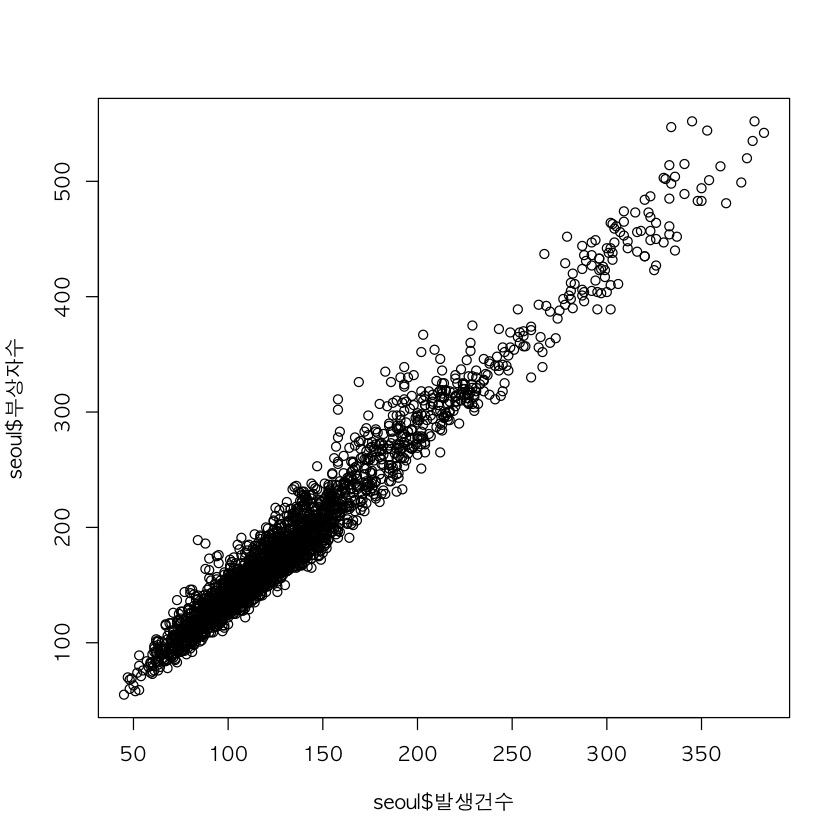

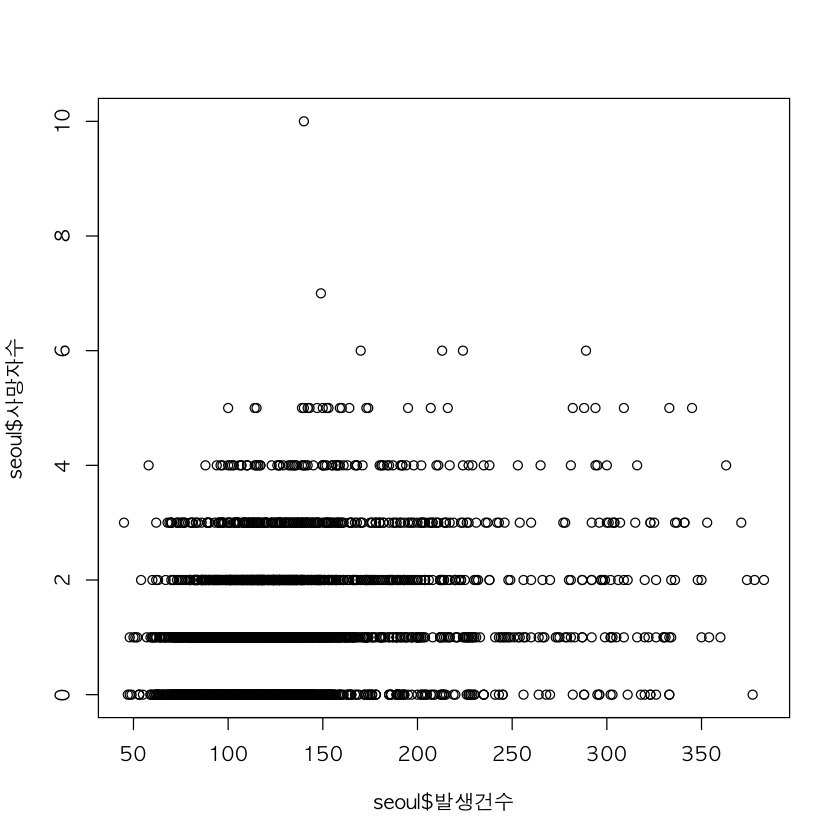

In [112]:
par(family="AppleGothic")
plot(seoul$발생건수,seoul$부상자수)
# 강한 상관관계
plot(seoul$발생건수,seoul$사망자수)
# 상관관계 없음